<a href="https://colab.research.google.com/github/Kunal-s-git/Kunal-s-git/blob/main/Heart_Disease_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview:
          We are given a dataset that contains data about people that contains heart disease and metrics.
#Objective:
          Using this data we will be applying Machine Learning techniques and determine the key metrics that are related to heart problems, in addition we will be making a model that will predict the percentage of a person having a heart disease.

---



 Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upload the dataset and make a dataframe.
df=pd.read_csv('/content/Heart Disease data.csv')
print(df.shape)     #1025 rows and 14 columns.

(1025, 14)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


all the values are non-null and are of int/float data type so we can skip data cleaning and data modification/transformation steps.

In [ ]:
print(df['target'].value_counts())
print('People with heart disease:',526/1025*100,'%')      #1
print('People with no heart disease:',499/1025*100,'%')     #0

1    526
0    499
Name: target, dtype: int64
People with heart disease: 51.31707317073171 %
People with no heart disease: 48.68292682926829 %


target classes are kind of equal so accuracy can be a good metric.

---



Let's see how all the values are related to each other.

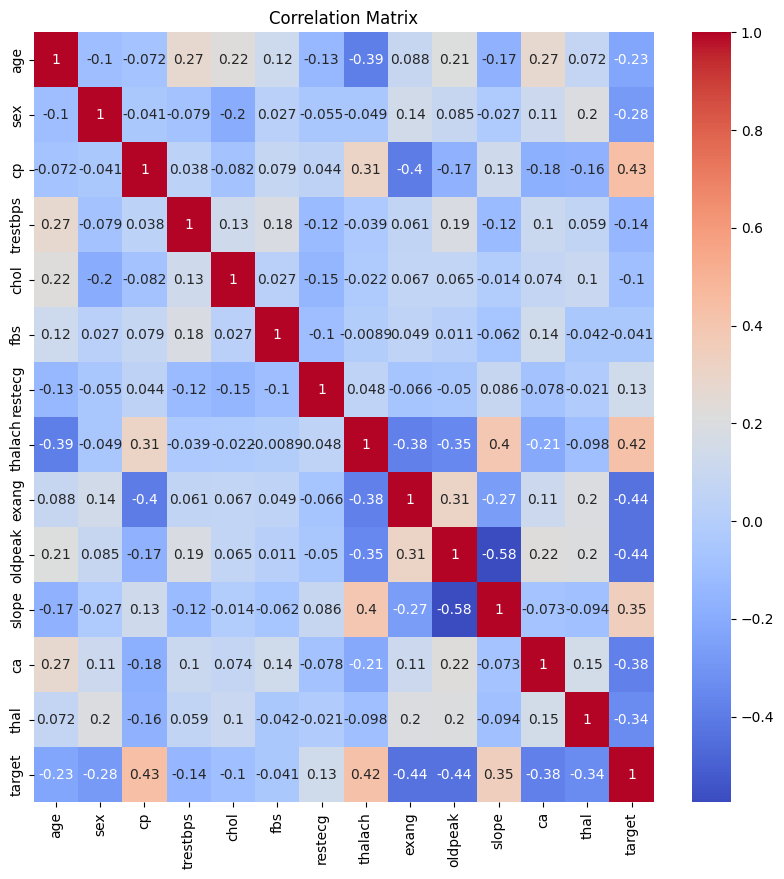

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

With this we are not getting lot of information but can see some important features.

---



Now we will make our features (X) and target (y) columns.

In [ ]:
X=df.drop('target',axis=1)
print(X.shape)
y=df['target']
print(y.shape)

(1025, 13)
(1025,)


importing all the important libraries for data science.

---



In [ ]:
from sklearn.linear_model import LogisticRegression     #a classification model
from sklearn.ensemble import RandomForestClassifier     #a classification model
from sklearn.model_selection import train_test_split,KFold    #for splitting the dataset
from sklearn.metrics import precision_score,recall_score,f1_score   #metrics

Splitting training and testing data.

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=10)
print('xtrain:',xtrain.shape)
print('ytrain:',ytrain.shape)

xtrain: (717, 13)
ytrain: (717,)



---
Making a model using Logistic Regression for prediction.



In [ ]:

lr_model=LogisticRegression(max_iter=1000)    #instantiate the model
lr_model.fit(xtrain,ytrain)                   #fitting the model
lr_pred=lr_model.predict(xtest)               #making predictions for test data
lr_pred_proba=lr_model.predict_proba(xtest)   #getting the probability for predictions
print('Logistic Regression model\'s accuracy:',lr_model.score(xtest,ytest)*100,'%')     #getting the accuracy
print('Logistic Regression model\'s precision:',precision_score(ytest,lr_pred)*100,'%') #getting the precision
print('Logistic Regression model\'s recall:',recall_score(ytest,lr_pred)*100,'%')       #getting the recall
print('Logistic Regression model\'s f1_score:',f1_score(ytest,lr_pred)*100,'%')         #getting the f1_score


Logistic Regression model's accuracy: 86.03896103896103 %
Logistic Regression model's precision: 82.94117647058825 %
Logistic Regression model's recall: 90.96774193548387 %
Logistic Regression model's f1_score: 86.76923076923076 %


Model performed good since classes were somewhat equally divided, but we can improve the model using different model, let's use Random Forest.

In [ ]:

rf_model=RandomForestClassifier()
rf_model.fit(xtrain,ytrain)
rf_pred=rf_model.predict(xtest)
print('Random Forest model\'s accuracy:',rf_model.score(xtest,ytest)*100,'%')
print('Random Forest model\'s precision:',precision_score(ytest,rf_pred)*100,'%')
print('Random Forest model\'s recall:',recall_score(ytest,rf_pred)*100,'%')
print('Random Forest model\'s f1_score:',f1_score(ytest,rf_pred)*100,'%')


Random Forest model's accuracy: 96.1038961038961 %
Random Forest model's precision: 97.35099337748345 %
Random Forest model's recall: 94.83870967741936 %
Random Forest model's f1_score: 96.07843137254902 %


---
Random Forest model scores are great and we can finalize it with KFold.

Using random forest (feature_importances_) attribute we can see the features with their Information Gain. And remove the features that don't influence the gain or are just random noise in data.

In [ ]:
imp_ft=pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
print(imp_ft)

cp          0.158434
oldpeak     0.114932
thalach     0.113228
thal        0.100550
ca          0.094755
age         0.084448
chol        0.077004
trestbps    0.075717
exang       0.062611
slope       0.045546
sex         0.044591
restecg     0.017463
fbs         0.010722
dtype: float64


Text(0.5, 1.0, '*Important Features*')

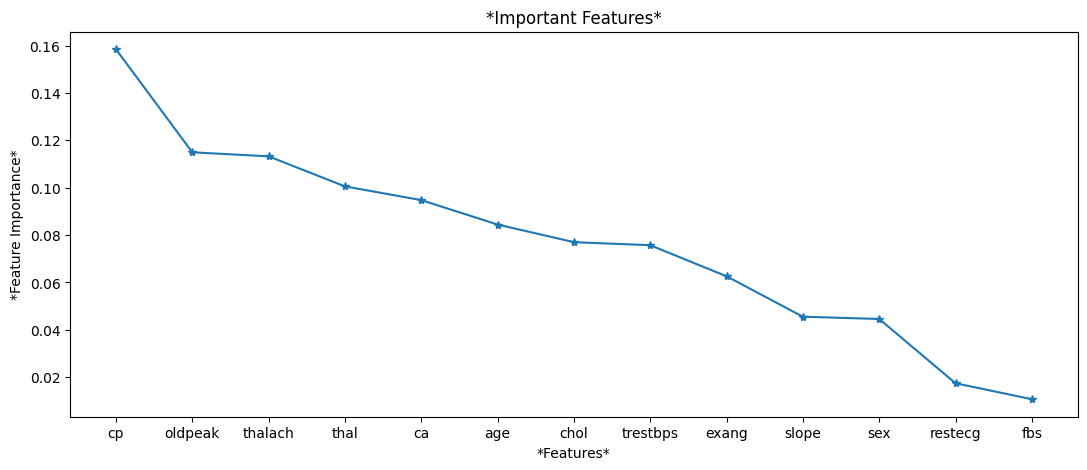

In [ ]:
plt.figure(figsize=(13,5))
plt.plot(imp_ft.index,imp_ft,marker="*")
plt.xlabel('*Features*')
plt.ylabel('*Feature Importance*')
plt.title('*Important Features*')


Features ['restecg','fbs'] don't provide that much information and seems to be random noise. So we can remove them and make a new model to finalize the prediction.

In [ ]:
x_fin=X[['sex','age','cp','trestbps','chol','thalach','exang','oldpeak','slope','ca','thal']].values

kf=KFold(n_splits=5,shuffle=True)
model=RandomForestClassifier()
acc,pre,rec,f1=[],[],[],[]

for train,test in kf.split(x_fin):
  x_train,x_test=x_fin[train],x_fin[test]
  y_train,y_test=y[train],y[test]
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc.append(model.score(x_test,y_test))
  pre.append(precision_score(y_test,y_pred))
  rec.append(recall_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred))

print(f'Accuracy = {np.mean(acc)*100}%')
print(f'Precision = {np.mean(pre)*100}%')
print(f'Recall = {np.mean(rec)*100}%')
print(f'F1 = {np.mean(f1)*100}%')

Accuracy = 99.41463414634146%
Precision = 99.44444444444444%
Recall = 99.43396226415095%
F1 = 99.43122851944202%


Model is performing great and we will finalize it.(Metrics can differ each time you run the code)

For making predictions for new data.

In [ ]:
example=x_fin[1:2]
print('Please enter your details in respective order\n1.Sex (1=Male and 0=Female)\n2.Age\n3.Chest Pain type\n4.Resting Blood Presure\n5.Cholestoral\n6.Maximum Heart Rate\n7.Exercise Angina\n8.OldPeak\n9.Slope\n10.Number fo major vessels\n11.Thal')
print('Example:',example,'\t\t *don\'t enter brackets*')
new_data=input('Seprate values with space:')
new_data=new_data.split(' ')
new_data=[[eval(i) for i in new_data]]

Please enter your details in respective order
1.Sex (1=Male and 0=Female)
2.Age
3.Chest Pain type
4.Resting Blood Presure
5.Cholestoral
6.Maximum Heart Rate
7.Exercise Angina
8.OldPeak
9.Slope
10.Number fo major vessels
11.Thal
Example: [[  1.   53.    0.  140.  203.  155.    1.    3.1   0.    0.    3. ]] 		 *don't enter brackets*
Seprate values with space:1 53 0 140 203 155 1 3 0 0 3


In [ ]:
def new_predict(data):
  pre=model.predict(data)
  if pre == 0:
    #print(bool(pre))
    print('Our model predicts that you don\'t have any problems related to heart.\nBut don\'t take it for give and take good care of your.')
  elif pre== 1:
    #print(bool(pre))
    print('Our model predicts that you have some problems related to heart.\nBut it\'s still not to late to recover from it.')


In [ ]:
new_predict(new_data)

Our model predicts that you don't have any problems related to heart.
But don't take it for give and take good care of your.




---
With this data we made Classification model to determine wether a person have problems related to heart or not.
##It seems like Chest Pain type, Number of major vessels colored by flourosopy, Maximum heart rate, oldpeak are key factors in determining the health of a person heart.